In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")


In [2]:
# Merging the tables based on foreign key
transactions = transactions.merge(products, on="ProductID", how="left")

# Grp Transaction Data by CustomerID and create new params - same as previous question
customer_txn = transactions.groupby("CustomerID").agg(
    TotalSpend=("TotalValue", "sum"),
    Frequency=("TransactionID", "count"),
    AvgOrderValue=("TotalValue", "mean")
).reset_index()

df = customers.merge(customer_txn, on="CustomerID", how="left").fillna(0)

In [3]:
# Region column from categorical to numerical
encoder = OneHotEncoder(sparse_output=False, drop="first")
region_encoded = encoder.fit_transform(df[["Region"]])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(["Region"]))
df = pd.concat([df.drop(columns=["Region", "CustomerName", "SignupDate"]), region_df], axis=1)

# Scaling numerical data for easy calculation
scaler = StandardScaler()
numerical_cols = ["TotalSpend", "Frequency", "AvgOrderValue"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [39]:
n_clusters = 2

#KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.drop(columns=["CustomerID"]))

# Clustering Metrics
silhouette = silhouette_score(df.drop(columns=["CustomerID", "Cluster"]), df['Cluster'])
db_index = davies_bouldin_score(df.drop(columns=["CustomerID", "Cluster"]), df['Cluster'])

print(f"Number of Clusters: {n_clusters}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Number of Clusters: 2
Silhouette Score: 0.3055
Davies-Bouldin Index: 1.2253


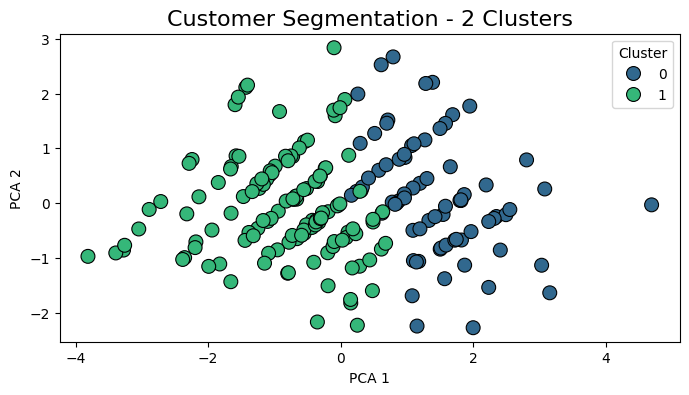

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=["CustomerID", "Cluster"]))

plt.figure(figsize=(8, 4))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='viridis', s=100, edgecolor='black')
plt.title(f'Customer Segmentation - {n_clusters} Clusters', fontsize=16)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
